<a href="https://colab.research.google.com/github/RobinTeotia/Data-Analysis-with-Python/blob/main/BC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Canada Data

Raw Data

In [20]:
#importing Pandas, Numpy and Matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import sklearn 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from matplotlib import pyplot as plt
from sklearn import  metrics
#print("scikit-learn version: %s" %sklearn.__version__)
# We want to max out the display here
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [21]:
#Importing data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
path_c="/content/drive/MyDrive/Approach Analytics/Province demographics.xlsx"

In [23]:
df_c=pd.read_excel(path_c,sheet_name="Province demographics")

In [24]:
df_c.head(10)

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,TNR,DATA_QUALITY_FLAG,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,CHARACTERISTIC_NOTE,C1_COUNT_TOTAL,SYMBOL,C2_COUNT_MEN+,SYMBOL.1,C3_COUNT_WOMEN+,SYMBOL.2,C10_RATE_TOTAL,SYMBOL.3,C11_RATE_MEN+,SYMBOL.4,C12_RATE_WOMEN+,SYMBOL.5
0,2021,2021A000011124,1,Country,Canada,3.1,20000,1,"Population, 2021",1.0,36991981.0,NaN,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
1,2021,2021A000011124,1,Country,Canada,3.1,20000,2,"Population, 2016",1.0,35151728.0,NaN,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
2,2021,2021A000011124,1,Country,Canada,3.1,20000,3,"Population percentage change, 2016 to 2021",NaN,5.2,NaN,NaN,...,NaN,...,5.2,NaN,NaN,...,NaN,...
3,2021,2021A000011124,1,Country,Canada,3.1,20000,4,Total private dwellings,2.0,16284235.0,NaN,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
4,2021,2021A000011124,1,Country,Canada,3.1,20000,5,Private dwellings occupied by usual residents,3.0,14978941.0,NaN,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
5,2021,2021A000011124,1,Country,Canada,3.1,20000,6,Population density per square kilometre,NaN,4.2,NaN,NaN,...,NaN,...,4.2,NaN,NaN,...,NaN,...
6,2021,2021A000011124,1,Country,Canada,3.1,20000,7,Land area in square kilometres,NaN,8788702.8,NaN,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
7,2021,2021A000011124,1,Country,Canada,3.1,20000,8,Total - Age groups of the population - 100% data,NaN,36991980.0,NaN,18226240.0,NaN,18765740.0,NaN,100.0,NaN,100.0,NaN,100.0,NaN
8,2021,2021A000011124,1,Country,Canada,3.1,20000,9,0 to 14 years,NaN,6012795.0,NaN,3086510.0,NaN,2926285.0,NaN,16.3,NaN,16.9,NaN,15.6,NaN
9,2021,2021A000011124,1,Country,Canada,3.1,20000,10,0 to 4 years,NaN,1831195.0,NaN,938790.0,NaN,892405.0,NaN,5.0,NaN,5.2,NaN,4.8,NaN


Filetering the required ages.

In [25]:
required_values=[ 14, 15	,16	,17	,18	,19	,20	,21	,22	,23	,25	,26	,27	,28	,30	,31	,32	,33]
df_c=df_c.loc[df_c['CHARACTERISTIC_ID'].isin(required_values)]
df_c=df_c.loc[df_c['GEO_NAME']=="British Columbia"]

In [26]:
df_c.head()

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,TNR,DATA_QUALITY_FLAG,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,CHARACTERISTIC_NOTE,C1_COUNT_TOTAL,SYMBOL,C2_COUNT_MEN+,SYMBOL.1,C3_COUNT_WOMEN+,SYMBOL.2,C10_RATE_TOTAL,SYMBOL.3,C11_RATE_MEN+,SYMBOL.4,C12_RATE_WOMEN+,SYMBOL.5
583,2021,2021A000259,59,Province,British Columbia,3.5,20000,14,15 to 19 years,NaN,253690.0,NaN,131245.0,NaN,122445.0,NaN,5.1,NaN,5.3,NaN,4.8,NaN
584,2021,2021A000259,59,Province,British Columbia,3.5,20000,15,20 to 24 years,NaN,294650.0,NaN,151505.0,NaN,143145.0,NaN,5.9,NaN,6.2,NaN,5.6,NaN
585,2021,2021A000259,59,Province,British Columbia,3.5,20000,16,25 to 29 years,NaN,337090.0,NaN,170500.0,NaN,166585.0,NaN,6.7,NaN,6.9,NaN,6.5,NaN
586,2021,2021A000259,59,Province,British Columbia,3.5,20000,17,30 to 34 years,NaN,358585.0,NaN,178925.0,NaN,179660.0,NaN,7.2,NaN,7.3,NaN,7.1,NaN
587,2021,2021A000259,59,Province,British Columbia,3.5,20000,18,35 to 39 years,NaN,353350.0,NaN,175175.0,NaN,178175.0,NaN,7.1,NaN,7.1,NaN,7.0,NaN


In [27]:
df_c.reset_index(inplace=True)
print(df_c.head())
df_c.drop(["index"], axis=1, inplace=True)

   index  CENSUS_YEAR        DGUID  ALT_GEO_CODE GEO_LEVEL          GEO_NAME  TNR  DATA_QUALITY_FLAG  CHARACTERISTIC_ID CHARACTERISTIC_NAME  CHARACTERISTIC_NOTE  C1_COUNT_TOTAL  SYMBOL  C2_COUNT_MEN+ SYMBOL.1  C3_COUNT_WOMEN+ SYMBOL.2  C10_RATE_TOTAL SYMBOL.3  C11_RATE_MEN+ SYMBOL.4  C12_RATE_WOMEN+ SYMBOL.5
0    583         2021  2021A000259            59  Province  British Columbia  3.5              20000                 14      15 to 19 years                  NaN        253690.0     NaN       131245.0      NaN         122445.0      NaN             5.1      NaN            5.3      NaN              4.8      NaN
1    584         2021  2021A000259            59  Province  British Columbia  3.5              20000                 15      20 to 24 years                  NaN        294650.0     NaN       151505.0      NaN         143145.0      NaN             5.9      NaN            6.2      NaN              5.6      NaN
2    585         2021  2021A000259            59  Province  British Co

In [28]:
df=df_c[['CHARACTERISTIC_ID','CHARACTERISTIC_NAME','C2_COUNT_MEN+','C3_COUNT_WOMEN+']]

In [29]:
df['age_bins'] = pd.cut(x=df['CHARACTERISTIC_ID'], bins=[13, 16, 23, 33],labels=['early', 'middle', 'old'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df.head(20)

,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C2_COUNT_MEN+,C3_COUNT_WOMEN+,age_bins
0,14,15 to 19 years,131245.0,122445.0,early
1,15,20 to 24 years,151505.0,143145.0,early
2,16,25 to 29 years,170500.0,166585.0,early
3,17,30 to 34 years,178925.0,179660.0,middle
4,18,35 to 39 years,175175.0,178175.0,middle
5,19,40 to 44 years,156480.0,163260.0,middle
6,20,45 to 49 years,149520.0,160515.0,middle
7,21,50 to 54 years,158540.0,170460.0,middle
8,22,55 to 59 years,172520.0,183825.0,middle
9,23,60 to 64 years,170210.0,184920.0,middle


In [31]:
df=df.groupby(['age_bins']).sum().astype(int)
df.drop(['CHARACTERISTIC_ID'], axis=1,inplace=True)
df.reset_index(inplace=True)
df.head()


,age_bins,C2_COUNT_MEN+,C3_COUNT_WOMEN+
0,early,453250,432175
1,middle,1161370,1220815
2,old,473645,542725


#Sample Working Data Set

Creating a working Data Set

In [152]:
data= {  "age": ["early","middle","old"],
  "men_count": [505,1425,633],
  "women_count": [529,1355,553]}
df=pd.DataFrame(data)
df

,age,men_count,women_count
0,early,505,529
1,middle,1425,1355
2,old,633,553


In [153]:
def datagenarator(age,malecount,feamlecount):
  Gender=np.repeat(("M","F"), (malecount,feamlecount))
  a=np.repeat(age,malecount+feamlecount)
  #p=np.repeat(province,malecount+feamlecount)
  df=pd.DataFrame(Gender,a)
  df.reset_index(inplace=True)
  df.columns = ["Age",'Gender',]
  #df['Gender'] = Gender
  return df

In [154]:
import random
rng = np.random.default_rng()
dfs=[]
for i, row in df.iterrows():
  #province=row['GEO_NAME']
  age=row['age']
  malecount=row['men_count']
  feamlecount=row['women_count']
  df=datagenarator( age, malecount, feamlecount)
  dfs.append(df)
master_df = pd.concat(dfs,axis=0,ignore_index=True)

In [155]:
df=master_df
print(df.tail())
df.shape

      Age Gender
4995  old      F
4996  old      F
4997  old      F
4998  old      F
4999  old      F


(5000, 2)

In [156]:
def ds(df_row):
  if df_row['Age'] == 'early':
    if df_row['Gender']=='M':
      ds=np.random.exponential(scale=8.16, size=1)
      ds=ds[0]
      ds=round(ds)
    else:
      ds=np.random.exponential(scale=11.27, size=1)
      ds=ds[0]
      ds=round(ds)
  elif df_row['Age'] == 'middle':
    if df_row['Gender']=='M':
      ds=np.random.exponential(scale=8.71, size=1)
      ds=ds[0]
      ds=round(ds)
    else:
      ds=np.random.exponential(scale=8.72, size=1)
      ds=ds[0]
      ds=round(ds)
  else:
    if df_row['Gender']=='M':
      ds=np.random.exponential(scale=5.61, size=1)
      ds=ds[0]
      ds=round(ds)
    else:
      ds=np.random.exponential(scale=7, size=1)
      ds=ds[0]
      ds=round(ds)
  return ds

In [157]:
df["Depression score"] = df.apply(ds, axis=1)
df.tail()

,Age,Gender,Depression score
4995,old,F,4
4996,old,F,1
4997,old,F,2
4998,old,F,14
4999,old,F,13


In [158]:
x=df['Depression score'].values
x=x.tolist()
x=np.array(x)
x.ndim

1

In [159]:
x1 = x.reshape(1, 5000)
x1.ndim

2

In [160]:
"""Example of generating correlated exponentially distributed random samples."""

import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 5000

# The desired covariance matrix.
r = np.array([
        [  1, 0.61],
        [ 0.61,  1],
    ])

# Generate samples from three independent exponentially distributed random
# variables (with mean 0 and std. dev. 1).
#x = norm.rvs(size=(3, num_samples))
#x1 = np.random.exponential(scale=8.16, size= (1,num_samples))
x2 = np.random.exponential(scale=8, size= (1, num_samples))
x  = np.concatenate((x1, x2), axis=0)

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

In [161]:
from numpy.lib.shape_base import column_stack
dfc=pd.DataFrame(y)
dfc=dfc.T
dfc.columns=['Lonliness Score','PHQ-9']
print(dfc.head())
print(dfc.shape)
dfc.corr()

   Lonliness Score      PHQ-9
0              4.0   4.616509
1             22.0  13.929007
2              0.0   5.845204
3             12.0   9.372282
4              5.0   9.071961
(5000, 2)


,Lonliness Score,PHQ-9
Lonliness Score,1.000000,0.638947
PHQ-9,0.638947,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f535e778850>,
      dtype=object)

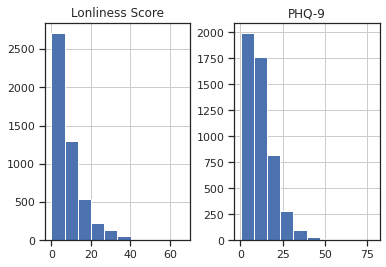

In [162]:
dfc.hist()

In [163]:
df=df.drop(['Depression score'], axis=1)
df=pd.concat([df,dfc], axis=1)
df

,Age,Gender,Lonliness Score,PHQ-9
0,early,M,4.0,4.616509
1,early,M,22.0,13.929007
2,early,M,0.0,5.845204
3,early,M,12.0,9.372282
4,early,M,5.0,9.071961
...,...,...,...,...
4995,old,F,4.0,17.361606
4996,old,F,1.0,22.997980
4997,old,F,2.0,10.188133
4998,old,F,14.0,12.171022


In [150]:
'''AgeList=["early","middle","old"]
for i in AgeList:
  master_df.loc[df['Age']==i].hist(bins=100, legend="i")
#master_df.loc[master_df['Age']=="middle"].hist(bins=100)
#master_df.loc[master_df['Age']=="old"].hist(bins=100)'''

'AgeList=["early","middle","old"]\nfor i in AgeList:\n  master_df.loc[df[\'Age\']==i].hist(bins=100, legend="i")\n#master_df.loc[master_df[\'Age\']=="middle"].hist(bins=100)\n#master_df.loc[master_df[\'Age\']=="old"].hist(bins=100)'

In [164]:
'''from scipy.stats import pearsonr
from scipy.optimize import minimize


df['BaselinePHQ-9'] = minimize(lambda x: abs(0.61 - pearsonr(df['Depression score'], x)[0]), 
                             np.random.rand(len(df['Depression score']))).x'''

"from scipy.stats import pearsonr\nfrom scipy.optimize import minimize\n\n\ndf['BaselinePHQ-9'] = minimize(lambda x: abs(0.61 - pearsonr(df['Depression score'], x)[0]), \n                             np.random.rand(len(df['Depression score']))).x"

In [165]:
df.head()

,Age,Gender,Lonliness Score,PHQ-9
0,early,M,4.0,4.616509
1,early,M,22.0,13.929007
2,early,M,0.0,5.845204
3,early,M,12.0,9.372282
4,early,M,5.0,9.071961


In [167]:
from scipy.stats import pearsonr
from scipy.optimize import minimize


df['BaselineGAD-7'] = minimize(lambda x: abs(0.5 - pearsonr(df['Lonliness Score'], x)[0]), 
                             np.random.rand(len(df['Lonliness Score']))).x

In [168]:
df.head()

,Age,Gender,Lonliness Score,PHQ-9,BaselineGAD-7
0,early,M,4.0,4.616509,0.441041
1,early,M,22.0,13.929007,0.735602
2,early,M,0.0,5.845204,0.587945
3,early,M,12.0,9.372282,0.249144
4,early,M,5.0,9.071961,0.837185


In [170]:
df[['Lonliness Score','BaselineGAD-7']].corr()

,Lonliness Score,BaselineGAD-7
Lonliness Score,1.0,0.5
BaselineGAD-7,0.5,1.0


In [171]:
pd.get_dummies(df,columns=['Gender'])

,Age,Lonliness Score,PHQ-9,BaselineGAD-7,Gender_F,Gender_M
0,early,4.0,4.616509,0.441041,0,1
1,early,22.0,13.929007,0.735602,0,1
2,early,0.0,5.845204,0.587945,0,1
3,early,12.0,9.372282,0.249144,0,1
4,early,5.0,9.071961,0.837185,0,1
...,...,...,...,...,...,...
4995,old,4.0,17.361606,0.340320,1,0
4996,old,1.0,22.997980,0.464022,1,0
4997,old,2.0,10.188133,0.665190,1,0
4998,old,14.0,12.171022,0.207561,1,0


#Redundant

In [ ]:
malecount=2
feamlecount=5
age=['early','middle','old']
for i in age:
  print(i)
  if i=='early':
    print("this is early")
  elif i=='middle':
    sample=np.random.lognormal(mean=0, sigma=1,size=malecount+feamlecount)
    print(sample)
  else:
    print("a is greater than b")



early
this is early
middle
[1.76598272 1.98804662 6.40595238 0.14260767 0.1719907  0.23937138
 4.35500567]
old
a is greater than b


In [ ]:
  if age=='early':
    print("this is early")
  elif age=='middle':
    sample=np.random.lognormal(mean=0, sigma=1,size=malecount+feamlecount)
    print(sample)
  else:
    print("a is greater than b")

a is greater than b


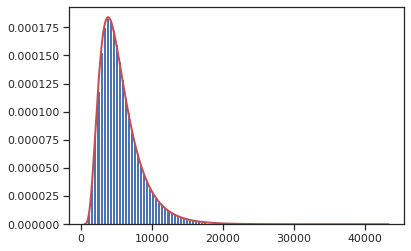

In [ ]:
sample=np.random.lognormal(mean=8.5, sigma=0.5,size=453250+432175)
mu,sigma=8.5, 0.5
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(sample, 100, density=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

In [ ]:
sample.mean()

5568.342837884112

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.optimize import minimize

data = pd.DataFrame({'Country A': [0, 11, 10, 9],
                     'Age': ['m','f','m','f']})

data['Country B'] = minimize(lambda x: abs(0.8 - pearsonr(data['Country A'], x)[0]), 
                             np.random.rand(len(data['Country A']))).x

In [ ]:
data

,Country A,Age,Country B
0,0,m,-0.514799
1,11,f,0.473153
2,10,m,1.650422
3,9,f,0.878546


In [ ]:
data.corr()

,Country A,Country B
Country A,1.0,0.8
Country B,0.8,1.0


In [ ]:
np.random.choice(np.arange(1, 7), p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2])

6

In [ ]:
import random
pdf = [(1, 0.1), (2, 0.05), (3, 0.05), (4, 0.2), (5, 0.4), (6, 0.2)]
cdf = [(i, sum(p for j,p in pdf if j < i)) for i,_ in pdf]
R = max(i for r in [random.random()] for i,c in cdf if c <= r)
sorted(max(i for r in [random.random()] for i,c in cdf if c <= r)
       for _ in range(1000))

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [ ]:
from random import choices
population = [1, 2, 3, 4, 5, 6]
weights = [0.1, 0.05, 0.05, 0.2, 0.4, 0.2]
choices(population, weights)

[4]

In [ ]:
million_samples = choices(population, weights, k=100)
from collections import Counter
Counter(million_samples)

Counter({1: 13, 2: 7, 3: 4, 4: 18, 5: 40, 6: 18})

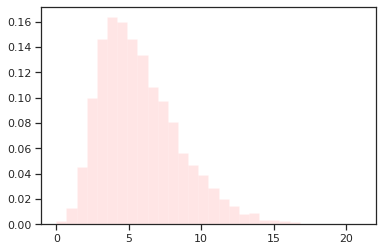

In [ ]:
from numpy.core.fromnumeric import mean
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

numValues = 10000
maxValue = 21
skewness = 5   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(random,30,density=True, color = 'red', alpha=0.1)
plt.show()

In [ ]:
import random
rng = np.random.default_rng()
x=np.random.exponential(scale=8.5, size=1000)
x.mean()

8.273588793839336